In [138]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from lmfit.models import LinearModel, LorentzianModel
from uncertainties import unumpy as up
from uncertainties import ufloat
from uncertainties import wrap
import uncertainties as uc
from pathlib import Path

In [139]:
def voigt1(x,s1,g1,o1,scale1,c):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)+c
def voigt2(x,s1,s2,g1,g2,o1,o2,scale1,scale2,c):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)+scale2*scipy.special.voigt_profile(x-o2,s2,g2)+c

In [140]:
def FWHM(s_p,g_p):
    s = ufloat(s_p.value,s_p.stderr)
    g = ufloat(g_p.value,g_p.stderr)
    fg=s*(8*up.log(2))**0.5
    fl=2*g
    return 0.5346*fl+((fg)**2+(0.2166*fl**2))**0.5

def uvoigt1(out_voigt):
    x_p,s1_p,g1_p,o1_p,scale1_p=out_voigt.result.params['o1'],out_voigt.result.params['s1'],out_voigt.result.params['g1'],out_voigt.result.params['o1'],out_voigt.result.params['scale1']
    x = ufloat(x_p.value,x_p.stderr)
    s1 = ufloat(s1_p.value,s1_p.stderr)
    g1 = ufloat(g1_p.value,g1_p.stderr)
    o1 = ufloat(o1_p.value,o1_p.stderr)
    scale1 = ufloat(scale1_p.value,scale1_p.stderr)
    uv=wrap(voigt1)
    return uv(x,s1,g1,o1,scale1)

def uvoigt2(out_voigt):
    x1_p,s1_p,g1_p,o1_p,scale1_p=out_voigt.result.params['o1'],out_voigt.result.params['s1'],out_voigt.result.params['g1'],out_voigt.result.params['o1'],out_voigt.result.params['scale1']
    x2_p,s2_p,g2_p,o2_p,scale2_p=out_voigt.result.params['o2'],out_voigt.result.params['s2'],out_voigt.result.params['g2'],out_voigt.result.params['o2'],out_voigt.result.params['scale2']
    x1 = ufloat(x1_p.value,x1_p.stderr)
    s1 = ufloat(s1_p.value,s1_p.stderr)
    g1 = ufloat(g1_p.value,g1_p.stderr)
    o1 = ufloat(o1_p.value,o1_p.stderr)
    scale1 = ufloat(scale1_p.value,scale1_p.stderr)
    x2 = ufloat(x2_p.value,x2_p.stderr)
    s2 = ufloat(s2_p.value,s2_p.stderr)
    g2 = ufloat(g2_p.value,g2_p.stderr)
    o2 = ufloat(o2_p.value,o2_p.stderr)
    scale2 = ufloat(scale2_p.value,scale2_p.stderr)


    uv=wrap(voigt2)

    p1 = uv(x1,s1,s2,g1,g2,o1,o2,scale1,scale2)
    p2 = uv(x2,s1,s2,g1,g2,o1,o2,scale1,scale2)
    return p1,p2

def uvoigt(out_voigt):
    try:
        return uvoigt2(out_voigt)
    except:
        return uvoigt1(out_voigt)

In [141]:
def FWHM(s_p,g_p):
    s = ufloat(s_p.value,s_p.stderr)
    g = ufloat(g_p.value,g_p.stderr)
    fg=s*(8*up.log(2))**0.5
    fl=2*g
    return 0.5346*fl+((fg)**2+(0.2166*fl**2))**0.5

def uvoigt1(out_voigt):
    x_p,s1_p,g1_p,o1_p,scale1_p=out_voigt.result.params['o1'],out_voigt.result.params['s1'],out_voigt.result.params['g1'],out_voigt.result.params['o1'],out_voigt.result.params['scale1']
    x = ufloat(x_p.value,x_p.stderr)
    s1 = ufloat(s1_p.value,s1_p.stderr)
    g1 = ufloat(g1_p.value,g1_p.stderr)
    o1 = ufloat(o1_p.value,o1_p.stderr)
    scale1 = ufloat(scale1_p.value,scale1_p.stderr)
    uv=wrap(voigt1)
    return uv(x,s1,g1,o1,scale1)

def uvoigt2(out_voigt):
    x1_p,s1_p,g1_p,o1_p,scale1_p=out_voigt.result.params['o1'],out_voigt.result.params['s1'],out_voigt.result.params['g1'],out_voigt.result.params['o1'],out_voigt.result.params['scale1']
    x2_p,s2_p,g2_p,o2_p,scale2_p=out_voigt.result.params['o2'],out_voigt.result.params['s2'],out_voigt.result.params['g2'],out_voigt.result.params['o2'],out_voigt.result.params['scale2']
    x1 = ufloat(x1_p.value,x1_p.stderr)
    s1 = ufloat(s1_p.value,s1_p.stderr)
    g1 = ufloat(g1_p.value,g1_p.stderr)
    o1 = ufloat(o1_p.value,o1_p.stderr)
    scale1 = ufloat(scale1_p.value,scale1_p.stderr)
    x2 = ufloat(x2_p.value,x2_p.stderr)
    s2 = ufloat(s2_p.value,s2_p.stderr)
    g2 = ufloat(g2_p.value,g2_p.stderr)
    o2 = ufloat(o2_p.value,o2_p.stderr)
    scale2 = ufloat(scale2_p.value,scale2_p.stderr)


    uv=wrap(voigt2)

    p1 = uv(x1,s1,s2,g1,g2,o1,o2,scale1,scale2)
    p2 = uv(x2,s1,s2,g1,g2,o1,o2,scale1,scale2)
    return p1,p2

def uvoigt(out_voigt):
    try:
        return uvoigt2(out_voigt)
    except:
        return uvoigt1(out_voigt)

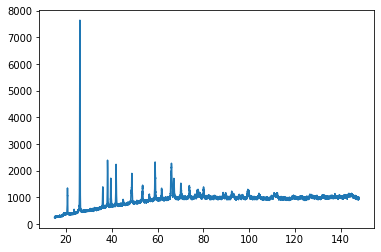

In [142]:
path =  'Data/Kopie_GeOx_Selbst_1000_24h_lang.x_y'
with open(path) as tf:
    data = np.loadtxt(tf,delimiter=" ").T

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])**0.5
data = np.vstack([data,err])
plt.plot(data[0],data[1])

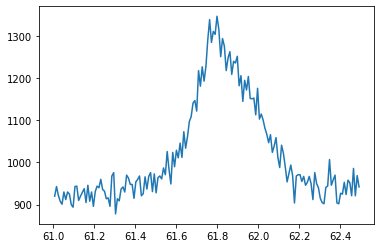

In [143]:
x=[[],[]]
for i in range(len(data[1])):
    if 61<data[0,i]<62.5:
        x[0].append(data[0,i])
        x[1].append(data[1,i])
plt.plot(x[0],x[1])

b1 (20.3,21)=[589:667]  
b2 (25.5,26.6)=[1167:1289]  
b3 (35.5,36.6)=[2278:2400]  
b4 (37.5,38.7)=[2500:2634]  
b5 (39.2,40)=[2689:2778]  
b6 (41.4,42.5)=[2934:3056]  
b7 (44.6,45.5)=[3289:3389]   
a8 (48,49.5)=[3667:3834]  
a9 (52.75,54)=[4195:4334]  
b10 (55.75,57)=[4528:4667]  
b11 (58.25,59.5)=[4806:4945]  
b12 (61,62.5)=[5112:5278]  

In [144]:
for i in range(len(data[0])):
    if data[0,i]>=62.5:
        print(i)
        break

5278


In [145]:
#modell erstellen b1 (20.3,21)=[589:667]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=20.5,min=20.3,max=21)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,589:667],x=data[0,589:667],params=pars_voigt,weights=1/data[2,589:667],nan_policy='propagate')
b1f=out_voigt.fit_report()
b1p=np.array([np.arange(20.3,21,0.001),out_voigt.eval(x=np.arange(20.3,21,0.001))])



In [146]:
#modell erstellen b2 (25.5,26.6)=[1167:1289]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=26,min=25.5,max=26.6)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,1167:1289],x=data[0,1167:1289],params=pars_voigt,weights=1/data[2,1167:1289],nan_policy='propagate')
b2f=out_voigt.fit_report()
b2p=np.array([np.arange(25.5,26.6,0.001),out_voigt.eval(x=np.arange(25.5,26.6,0.001))])




In [147]:
#modell erstellen b3 (35.5,36.6)=[2278:2400]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=36,min=35.5,max=36.6)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,2278:2400],x=data[0,2278:2400],params=pars_voigt,weights=1/data[2,2278:2400],nan_policy='propagate')
b3f=out_voigt.fit_report()
b3p=np.array([np.arange(35.5,36.6,0.001),out_voigt.eval(x=np.arange(35.5,36.6,0.001))])



In [148]:
#modell erstellen b4 (37.5,38.7)=[2500:2634]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=38,min=37.5,max=38.7)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,2500:2634],x=data[0,2500:2634],params=pars_voigt,weights=1/data[2,2500:2634],nan_policy='propagate')
b4f=out_voigt.fit_report()
b4p=np.array([np.arange(37.5,38.7,0.001),out_voigt.eval(x=np.arange(37.5,38.7,0.001))])




In [149]:
#modell erstellen b5 (39.2,40)=[2689:2778]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=39.5,min=39.2,max=40)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,2689:2778],x=data[0,2689:2778],params=pars_voigt,weights=1/data[2,2689:2778],nan_policy='propagate')
b5f=out_voigt.fit_report()
b5p=np.array([np.arange(39.2,40,0.001),out_voigt.eval(x=np.arange(39.2,40,0.001))])




In [150]:
#modell erstellen b6 (41.4,42.5)=[2934:3056]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=42,min=41.4,max=42.5)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,2934:3056],x=data[0,2934:3056],params=pars_voigt,weights=1/data[2,2934:3056],nan_policy='propagate')
b6f=out_voigt.fit_report()
b6p=np.array([np.arange(41.4,42.5,0.001),out_voigt.eval(x=np.arange(41.4,42.5,0.001))])




In [151]:
#modell erstellen b7 (44.6,45.5)=[3289:3389]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0.01,max=1)
pars_voigt["o1"].set(value=45,min=44.6,max=45.5)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,3289:3389],x=data[0,3289:3389],params=pars_voigt,weights=1/data[2,3289:3389],nan_policy='propagate')
b7f=out_voigt.fit_report()
b7p=np.array([np.arange(44.6,45.5,0.001),out_voigt.eval(x=np.arange(44.6,45.5,0.001))])




In [152]:
#modell erstellen    a8 (48,49.5)=[3667:3834]
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0.01,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
pars_voigt["o1"].set(value=48.5,min=48,max=49.5)
pars_voigt["o2"].set(value=49,min=48,max=49.5)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
pars_voigt["c"].set(1)
 
#Fitten
out_voigt = model_voigt.fit(data[1,3667:3834],x=data[0,3667:3834],params=pars_voigt,weights=1/data[2,3667:3834],nan_policy='propagate')
a8f=out_voigt.fit_report()
a8p=np.array([np.arange(48,49.5,0.001),out_voigt.eval(x=np.arange(48,49.5,0.001))])




In [153]:
#modell erstellen    a9 (52.75,54)=[4195:4334] 
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0.01,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
pars_voigt["o1"].set(value=53,min=52.75,max=54)
pars_voigt["o2"].set(value=53.5,min=52.75,max=54)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
pars_voigt["c"].set(1)
 
#Fitten
out_voigt = model_voigt.fit(data[1,4195:4334],x=data[0,4195:4334],params=pars_voigt,weights=1/data[2,4195:4334],nan_policy='propagate')
a9f=out_voigt.fit_report()
a9p=np.array([np.arange(52.75,54,0.001),out_voigt.eval(x=np.arange(52.75,54,0.001))])




In [154]:
#modell erstellen b10 (55.75,57)=[4528:4667] 
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=56.4,min=55.75,max=57)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,4528:4667],x=data[0,4528:4667],params=pars_voigt,weights=1/data[2,4528:4667],nan_policy='propagate')
b10f=out_voigt.fit_report()
b10p=np.array([np.arange(55.75,57,0.001),out_voigt.eval(x=np.arange(55.75,57,0.001))])




In [155]:
#modell erstellen b11 (58.25,59.5)=[4806:4945] 
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=59,min=58.25,max=59.5)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,4806:4945],x=data[0,4806:4945],params=pars_voigt,weights=1/data[2,4806:4945],nan_policy='propagate')
b11f=out_voigt.fit_report()
b11p=np.array([np.arange(58.25,59.5,0.001),out_voigt.eval(x=np.arange(58.25,59.5,0.001))])




In [156]:
#modell erstellen b12 (61,62.5)=[5112:5278] 
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=61.8,min=61,max=62.5)
pars_voigt["scale1"].set(7000)
pars_voigt["c"].set(1)

#Fitten
out_voigt = model_voigt.fit(data[1,5112:5278],x=data[0,5112:5278],params=pars_voigt,weights=1/data[2,5112:5278],nan_policy='propagate')
b12f=out_voigt.fit_report()
b12p=np.array([np.arange(61,62.5,0.001),out_voigt.eval(x=np.arange(61,62.5,0.001))])




Text(0.5, 0, 'Winkel 2$\\theta$[$^\\circ$]')

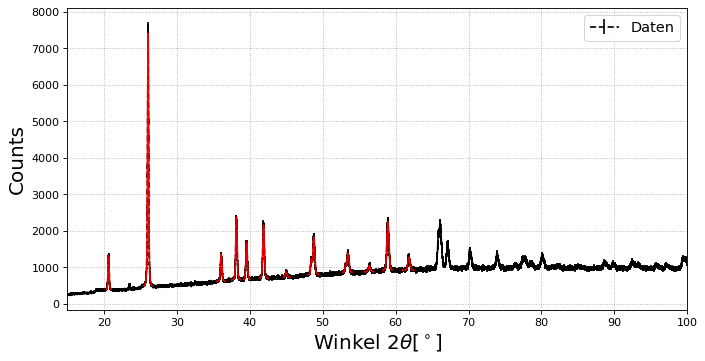

In [159]:
fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0],data[1],yerr=data[2],zorder=5,mfc='black',color='k',linestyle='--',label='Daten')
plt.plot(b1p[0],b1p[1],zorder=10,color='r',alpha=0.9)
plt.plot(b2p[0],b2p[1],zorder=10,color='r',alpha=0.9)
plt.plot(b3p[0],b3p[1],zorder=10,color='r',alpha=0.9)
plt.plot(b4p[0],b4p[1],zorder=10,color='r',alpha=0.9)
plt.plot(b5p[0],b5p[1],zorder=10,color='r',alpha=0.9)
plt.plot(b6p[0],b6p[1],zorder=10,color='r',alpha=0.9)
plt.plot(b7p[0],b7p[1],zorder=10,color='r',alpha=0.9)
plt.plot(a8p[0],a8p[1],zorder=10,color='r',alpha=0.9)
plt.plot(a9p[0],a9p[1],zorder=10,color='r',alpha=0.9)
plt.plot(b10p[0],b10p[1],zorder=10,color='r',alpha=0.9)
plt.plot(b11p[0],b11p[1],zorder=10,color='r',alpha=0.9)
plt.plot(b12p[0],b12p[1],zorder=10,color='r',alpha=0.9)


plt.legend(fontsize=13)
plt.grid(axis='both',linestyle=':')
plt.xlim(15,100)
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)



